# Self-Attention-Guided Stable Diffusion

This notebook aims to show the effect of Self-Attention Guidance (SAG) proposed by Hong et al. SAG is plug-and-play guidance that can plugged into any types of diffusion models using their self-attention map. To get more information, I recommend you to check out the paper at arXiv (https://arxiv.org/abs/2210.00939).

## Setup Environment

In [1]:
!git clone https://github.com/SusungHong/Self-Attention-Guidance.git
!pip install diffusers transformers accelerate
%cd Self-Attention-Guidance

fatal: destination path 'Self-Attention-Guidance' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/Self-Attention-Guidance


In [2]:
import torch
import cv2
from pipeline_stable_diffusion_sag import StableDiffusionSAGPipeline
from accelerate.utils import set_seed
from google.colab.patches import cv2_imshow

In [3]:
pipe = StableDiffusionSAGPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

## Sampling parameters

In [4]:
# Choose your seed and prompt
# SAG produce good images with empty prompts ("." or " ")
seed = 8978
prompt = "."

# The scale of classifier-free guidance
# The smaller the scale is, the clearer the effect of SAG becomes
guidance_scale = 1.0

# The scale of SAG
# Choose between 0.5 ~ 1.0
sag_scale = 1.0

## Sample without and with SAG

In [5]:
# without SAG
set_seed(seed)
images = pipe(prompt, num_images_per_prompt=1, guidance_scale=guidance_scale, sag_scale=0.0).images
images[0].save(f'ori.png')

# with SAG
set_seed(seed)
images = pipe(prompt, num_images_per_prompt=1, guidance_scale=guidance_scale, sag_scale=sag_scale).images
images[0].save(f'sag.png')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

## Compare the results

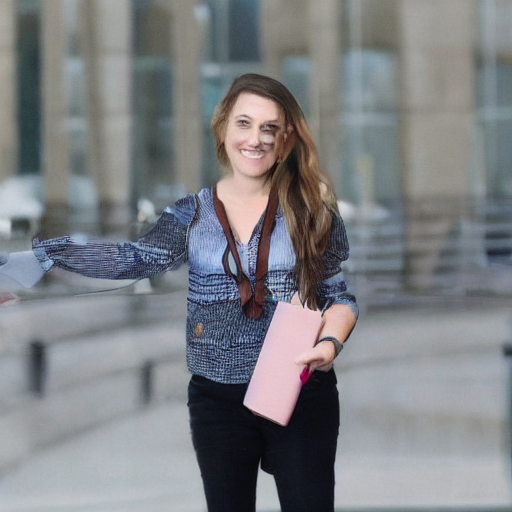

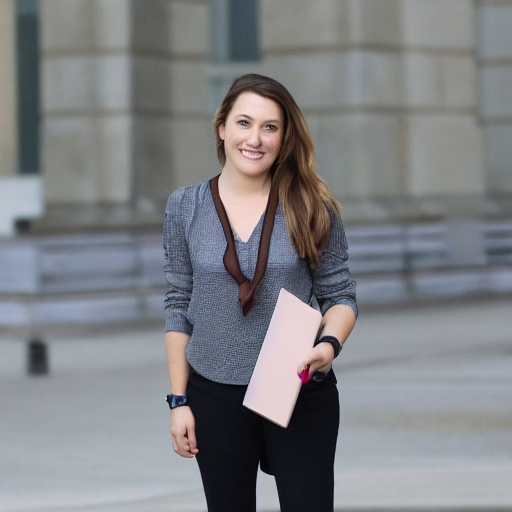

In [6]:
img_ori = cv2.imread('ori.png')
img_sag = cv2.imread('sag.png')
cv2_imshow(img_ori)
cv2_imshow(img_sag)